# Data Analytics I
### Create a Linear Regression Model using Python/R to predict home prices using Boston Housing
Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains
information about various houses in Boston through different parameters. There are 506 samples
and 14 feature variables in this dataset.
The objective is to predict the value of prices of the house using the given features.

### Data description
The Boston data frame has 506 rows and 14 columns.

This data frame contains the following columns:

- `crim` : per capita crime rate by town.
- `zn` : proportion of residential land zoned for lots over 25,000 sq.ft.
- `indus` : proportion of non-retail business acres per town.
- `chas` : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- `nox` : nitrogen oxides concentration (parts per 10 million).
- `rm` : average number of rooms per dwelling.
- `age` : proportion of owner-occupied units built prior to 1940.
- `dis` : weighted mean of distances to five Boston employment centres.
- `rad` : index of accessibility to radial highways.
- `tax` : full-value property-tax rate per \$10,000.
- `ptratio` : pupil-teacher ratio by town.
- `black` : 1000 (Bk - 0.63)^2 where Bk is the proportion of blacks by town.
- `lstat` : lower status of the population (percent).
- `medv` : median value of owner-occupied homes in $1000s.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


#### Initial Analysis

In [ ]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
BLACK      0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  BLACK    506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


#### Modeling

In [ ]:
x = df.drop('MEDV', axis = 1)
y = df['MEDV']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, train_size = 0.8)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr = lr.fit(x_train, y_train)

In [ ]:
print(lr.coef_)
print(lr.intercept_)

[-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]
30.24675099392366


In [ ]:
equation = f"MEDV = {lr.intercept_:.2f}"
for i in range(len(lr.coef_)):
  equation += f" + {lr.coef_[i]:.2f} * {x_train.columns[i]}"
print(equation)

MEDV = 30.25 + -0.11 * CRIM + 0.03 * ZN + 0.04 * INDUS + 2.78 * CHAS + -17.20 * NOX + 4.44 * RM + -0.01 * AGE + -1.45 * DIS + 0.26 * RAD + -0.01 * TAX + -0.92 * PTRATIO + 0.01 * BLACK + -0.51 * LSTAT


In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
y_pred

array([28.99672362, 36.02556534, 14.81694405, 25.03197915, 18.76987992,
       23.25442929, 17.66253818, 14.34119   , 23.01320703, 20.63245597,
       24.90850512, 18.63883645, -6.08842184, 21.75834668, 19.23922576,
       26.19319733, 20.64773313,  5.79472718, 40.50033966, 17.61289074,
       27.24909479, 30.06625441, 11.34179277, 24.16077616, 17.86058499,
       15.83609765, 22.78148106, 14.57704449, 22.43626052, 19.19631835,
       22.43383455, 25.21979081, 25.93909562, 17.70162434, 16.76911711,
       16.95125411, 31.23340153, 20.13246729, 23.76579011, 24.6322925 ,
       13.94204955, 32.25576301, 42.67251161, 17.32745046, 27.27618614,
       16.99310991, 14.07009109, 25.90341861, 20.29485982, 29.95339638,
       21.28860173, 34.34451856, 16.04739105, 26.22562412, 39.53939798,
       22.57950697, 18.84531367, 32.72531661, 25.0673037 , 12.88628956,
       22.68221908, 30.48287757, 31.52626806, 15.90148607, 20.22094826,
       16.71089812, 20.52384893, 25.96356264, 30.61607978, 11.59

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)
r2 = r2_score(y_pred, y_test)

print(f'mae: {mae}, mse: {mse}, r2: {r2}')

mae: 3.189091965887837, mse: 24.291119474973478, r2: 0.6333247469014351


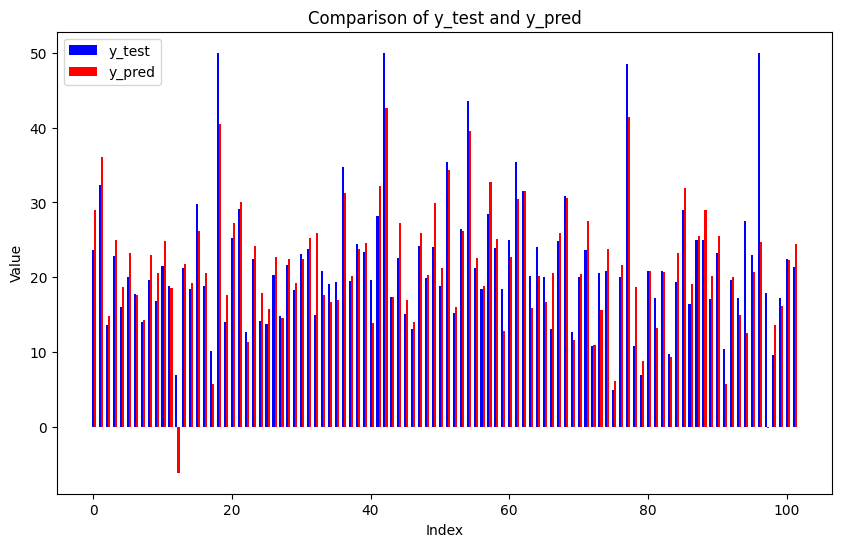

In [ ]:
plt.figure(figsize=(10, 6))

# Create bar plots for y_test and y_pred
plt.bar(np.arange(len(y_test)), y_test, label="y_test", color="blue", width=0.3)
plt.bar(np.arange(len(y_pred)) + 0.3, y_pred, label="y_pred", color="red", width=0.3)

# Add title and axis labels
plt.title("Comparison of y_test and y_pred")
plt.xlabel("Index")
plt.ylabel("Value")
